# 연령별취업자수관계

- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기

In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

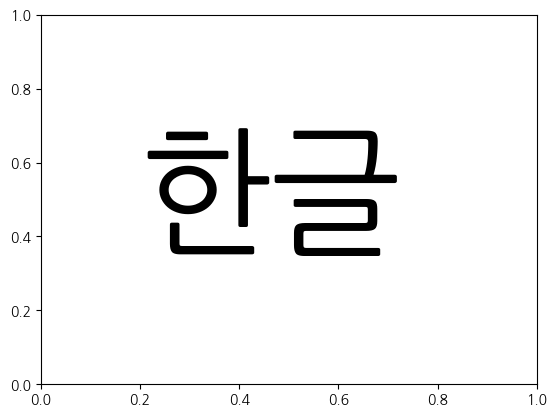

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path ="./ref/행정구역시도_성연령별취업자_20250304.csv" 
ori= pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy() # 복사
ex_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시', 'value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
11515,제주도,2024,40 - 49세,여자,43
11516,제주도,2024,50 - 59세,남자,54
11517,제주도,2024,50 - 59세,여자,45
11518,제주도,2024,60세이상,남자,48


In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")
ex1_data

,year,total
0,2000,20796
1,2001,21267
2,2002,21929
3,2003,21965
4,2004,22426
...,...,...
64,2024,28433
65,2024.1/4,27927
66,2024.2/4,28689
67,2024.3/4,28682


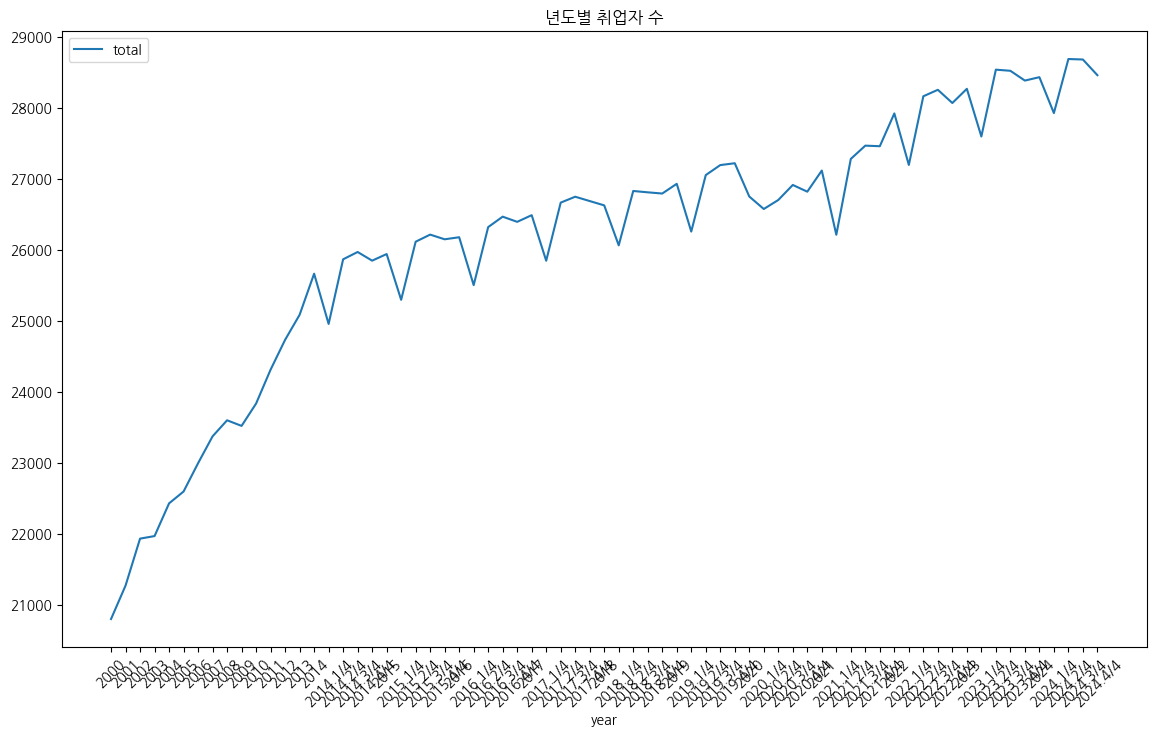

In [6]:
ax = ex1_data.plot(x='year', y='total', figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [7]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시', 'value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
11515,제주도,2024,40 - 49세,여자,43
11516,제주도,2024,50 - 59세,남자,54
11517,제주도,2024,50 - 59세,여자,45
11518,제주도,2024,60세이상,남자,48


In [8]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2000,남자,12219
1,2000,여자,8577
2,2001,남자,12448
3,2001,여자,8819
4,2002,남자,12853
...,...,...,...
133,2024.2/4,여자,12716
134,2024.3/4,남자,15945
135,2024.3/4,여자,12737
136,2024.4/4,남자,15868


In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

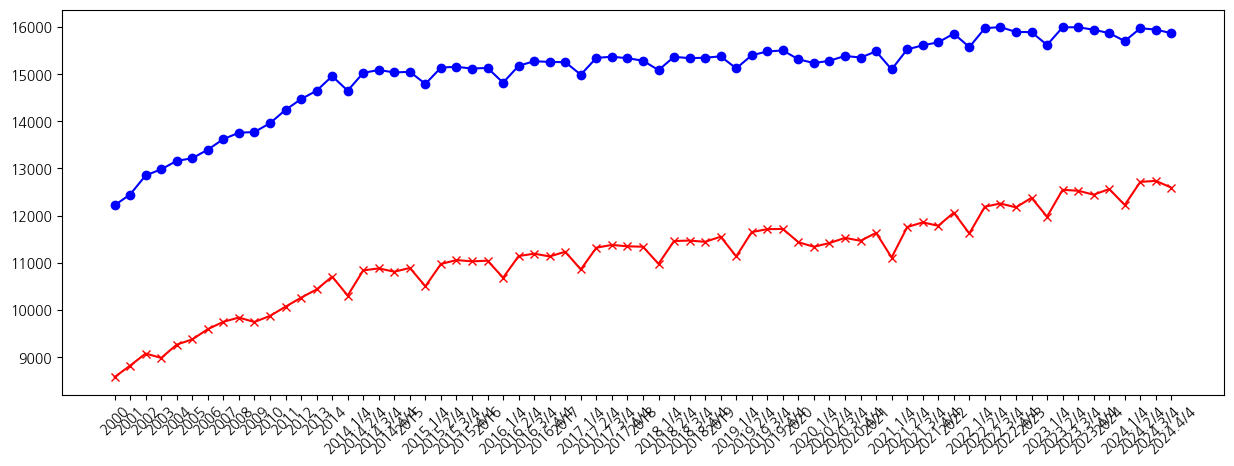

In [10]:
plt.figure(figsize=(15,5))
plt.plot(male['year'], male['total'], label='남자', color="blue", linestyle='-', marker='o')
plt.plot(female['year'], female['total'], label='여자', color="red", linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

In [11]:
ex3_data = ori.copy()
ex3_data = ex3_data.fillna(0)
ex3_data['데이터']=ex3_data['데이터'].replace('-',0)
ex3_data['데이터']=ex3_data['데이터'].fillna(0).astype(int)

In [12]:
filter0 =(ex3_data['시점'] >= "2018.1/4") & (ex3_data['시점']<="2019.1/4")
filter0.sample(20)
ex3_data = ex3_data[filter0]
ex3_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [13]:
x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex3_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)

x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 전체 취업자 수

In [14]:
import numpy as np
regions = list(x.index) # 라벨
color = [ np.random.rand(3,) for _ in range(len(regions))] # 랜덤색상 color

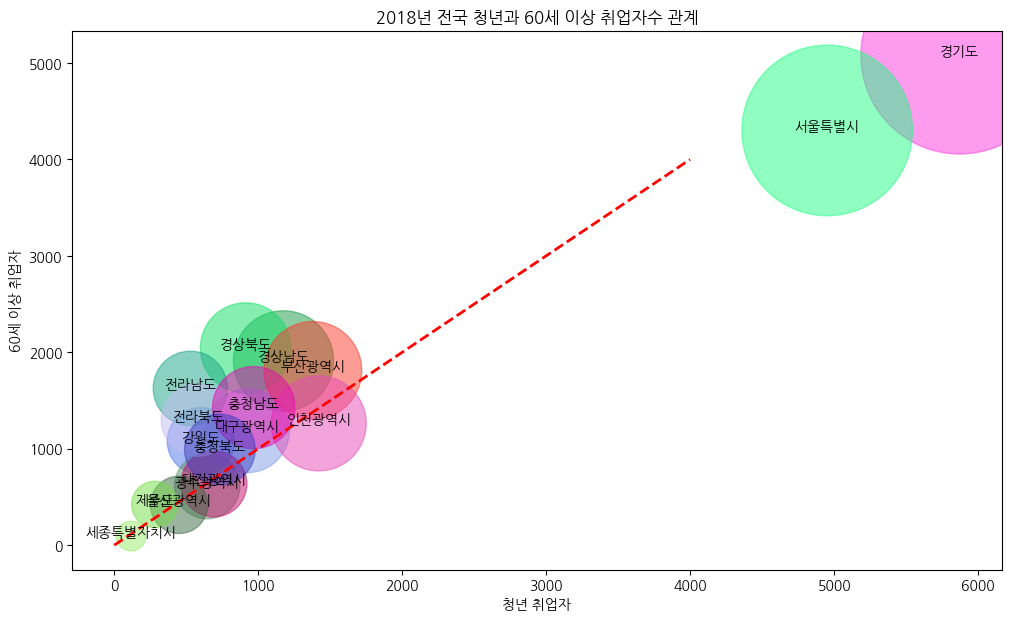

In [15]:
fig , ax = plt.subplots(figsize=(12,7))
z = np.array(z, dtype=float)
scatter = ax.scatter(x,y, s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n],y.iloc[n]), ha="center")

ax.plot([0,4000],[0,4000], color="r", linestyle="--", linewidth=2)

ax.set_title("2018년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel("청년 취업자")
ax.set_ylabel("60세 이상 취업자")
plt.show()